# Churn para Empresa de Telecom

## **Glossário de Dados:**

**genero:** gênero biológico do cliente (female, male)

**idoso:** Verifica se o cliente é considerado idoso. (1 para sim e 0 para não)

**parceiro:** Verifica se o cliente possui conjunge. (Sim, Não)

**dependentes:** Verifica se o cliente possui dependentes. (Sim, Não)

**tempoDeServico:** Número de meses que o cliente utiliza os serviços da Telecom.

**ServicoTelefone:** Verifica se o cliente possui um serviço de telefone. (Sim, Não)

**MultiLinhas:** Verifica se o cliente possui mais de uma linha em um contrato de telefone. (Sim, Não, Sem serviço de telefone)

**ServicoInternet:** Verifica se o cliente possui um serviço de internet. (DSL, Fibra Óptica, Não)

**ServicoSegurancaCyber:** Verifica se o cliente possui um serviço de segurança na internet. (Sim, Não, Sem serviço de internet)

**ServicoBackup:** Verifica se o cliente possui um serviço de segurança de backup de arquivos. (Sim, Não, Sem serviço de internet)

**SeguroDispositivos:** Verifica se o cliente possui um serviço de proteção de dispositvos. (Sim, Não, Sem serviço de internet)

**ServicoSuporteTecnico:** Verifica se o cliente possui um serviço de suporte técnico. (Sim, Não, Sem serviço de internet)

**StreamingTV:** Verfica se o cliente possui serviço de Streaming de canais de TV. (Sim, Não, Sem serviço de internet)

**StreamingFilmes:** Verfica se o cliente possui serviço de Streaming de Filmes. (Sim, Não, Sem serviço de internet)

**Contrato:** Tipo de contrato do cliente. (Mensal, 1 Ano, 2 Anos)

**BillingDigital:** Verifica se o cliente recebe a fatura de forma digital. (Sim, Não)

**MetodoPagamento:** Tipo de pagamento da fatura do cliente (Cheque Eletrônico, Cheque por carta, Transferência Bancária (Automática), Cartão de Crédito (Automático))

**FaturaMensal:** Total cobrado ao cliente mensalmente.

**FaturaTotal:** Total cobrado ao cliente.

**Churn:** Verifica se o cliente cancelou o contrato de serviço e saiu da empresa de telecom. (Sim, Não)

## Carregando os dados

In [45]:
# Importando bibliotecas a serem utilizadas:

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pré-processamento de dados:

from sklearn.preprocessing import(
    OneHotEncoder,MinMaxScaler,PolynomialFeatures
)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Treinamento e avaliação dos modelos:

from sklearn.model_selection import (
    train_test_split,GridSearchCV,cross_val_score
)

from sklearn.metrics import (
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,
    average_precision_score, classification_report, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay, accuracy_score
)

# Modelos:

from sklearn.linear_model import (
    LogisticRegression,SGDClassifier
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [46]:
# Montando o drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Carregando o arquivo
data = pd.read_csv('/content/drive/MyDrive/DATASETS/train_churn.csv', sep=';')
data.reset_index(drop=True,inplace=True)

In [48]:
# Carregando a base de dados
data = data.drop(data.columns[0], axis=1)
data.head()

,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,ServicoBackup,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,Sim,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,Não,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,Sim,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,Não,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0


In [49]:
# Verificando a distribuição dos dados
data.describe()

,idoso,tempoDeServico,FaturaMensal,NumTickets,NumTicketsTecnico,Churn
count,4735.000000,4747.000000,4726.000000,4731.000000,4745.000000,4736.000000
mean,0.163464,32.158205,64.801947,0.503488,0.411170,0.263091
std,0.369827,29.592578,35.930051,1.260113,1.230994,0.440358
min,0.000000,-112.000000,-127.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,34.700000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.400000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.400000,0.000000,0.000000,1.000000
max,1.000000,190.000000,247.000000,5.000000,8.000000,1.000000


In [50]:
# Visualizando as informações de cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genero                 4759 non-null   object 
 1   idoso                  4735 non-null   float64
 2   parceiro               4762 non-null   object 
 3   dependentes            4766 non-null   object 
 4   tempoDeServico         4747 non-null   float64
 5   ServicoTelefone        4789 non-null   object 
 6   MultiLinhas            4745 non-null   object 
 7   ServicoInternet        4771 non-null   object 
 8   ServicoSegurancaCyber  4778 non-null   object 
 9   ServicoBackup          4737 non-null   object 
 10  SeguroDispositivos     4750 non-null   object 
 11  ServicoSuporteTecnico  4767 non-null   object 
 12  StreamingTV            4751 non-null   object 
 13  StreamingFilmes        4775 non-null   object 
 14  Contrato               4738 non-null   object 
 15  Bill

## Imputando os valores nulos e categorizandos as variáveis

In [51]:
# Verificando a quantidade de valores nulos no dataset
data.isnull().sum()

genero                   241
idoso                    265
parceiro                 238
dependentes              234
tempoDeServico           253
ServicoTelefone          211
MultiLinhas              255
ServicoInternet          229
ServicoSegurancaCyber    222
ServicoBackup            263
SeguroDispositivos       250
ServicoSuporteTecnico    233
StreamingTV              249
StreamingFilmes          225
Contrato                 262
BillingDigital           238
MetodoPagamento          244
FaturaMensal             274
FaturaTotal              238
NumTickets               269
NumTicketsTecnico        255
Churn                    264
dtype: int64

In [52]:
# Variável Gênero
data['genero'] = data['genero'].fillna(data['genero'].mode()[0])

data['genero'] = data['genero'].replace({'Masculino': 1, 'Feminino': 0})

In [53]:
# Variável Idoso
data['idoso'] = data['idoso'].fillna(data['idoso'].mode()[0])

In [54]:
# Variável Parceiro
data['parceiro'] = data['parceiro'].fillna(data['parceiro'].mode()[0])

data['parceiro'] = data['parceiro'].replace({'Sim' : 1, 'Não' : 0})

In [55]:
# Variável Dependentes
data['dependentes'] = data['dependentes'].fillna(data['dependentes'].mode()[0])

data['dependentes'] = data['dependentes'].replace({'Sim' : 1, 'Não' : 0})

In [56]:
# Variável TempoDeServico
data['tempoDeServico'] = data['tempoDeServico'].fillna(data['tempoDeServico'].median())

In [57]:
# Variável ServicoTelefone
data['ServicoTelefone'] = data['ServicoTelefone'].fillna(data['ServicoTelefone'].mode()[0])

data['ServicoTelefone'] = data['ServicoTelefone'].replace({'Sim' : 1, 'Não' : 0})

In [58]:
# Variável MultiLinhas
data.loc[data['ServicoTelefone'] == 'Não', 'MultiLinhas'] = 'Sem serviço de telefone'

data['MultiLinhas'].fillna(data['MultiLinhas'].mode()[0], inplace=True)

data['MultiLinhas'] = data['MultiLinhas'].replace({'Sim' : 1, 'Não' : 0, 'Sem serviço de telefone': 0})

In [59]:
# Variáveis ServicoSegurancaCyber, ServicoBackup, SeguroDispositivos, ServicoSuporteTecnico, StreamingTV e StreamingFilmes
def processar_coluna(df, col, valor_padrao=0):

    df.loc[df[col] == 'Sem serviço de internet', 'ServicoInternet'] = 'Não'

    df['ServicoInternet'].fillna(df['ServicoInternet'].mode()[0], inplace=True)

    df.loc[df['ServicoInternet'] == 'Não', col] = 'Sem serviço de internet'

    df[col].fillna(df[col].mode()[0], inplace=True)

    df[col] = df[col].replace({'Não': valor_padrao, 'Sim': 1, 'Sem serviço de internet': valor_padrao})

cols = ['ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos', 'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes']

for col in cols:
    processar_coluna(data, col)

In [60]:
# Variável Contrato
data['Contrato'] = data['Contrato'].fillna(data['Contrato'].mode()[0])

In [61]:
# Variável BillingDigital
data['BillingDigital'] = data['BillingDigital'].fillna(data['BillingDigital'].mode()[0])

data['BillingDigital'] = data['BillingDigital'].replace({'Sim' : 1, 'Não' : 0})

In [62]:
# Variável MetodoPagamento
data['MetodoPagamento'] = data['MetodoPagamento'].fillna(data['MetodoPagamento'].mode()[0])

In [63]:
# Aplicando OneHotEncoder nas variáveis ServicoInternet, Contrato e MetodoPagamento
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['ServicoInternet', 'Contrato', 'MetodoPagamento']

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = encoder.fit_transform(data[columns_to_encode])

new_columns = encoder.get_feature_names_out(columns_to_encode)

data[new_columns] = encoded_data

data.drop(columns=columns_to_encode, inplace=True)

In [64]:
# Variável FaturaMensal
data['FaturaMensal'] = data['FaturaMensal'].fillna(data['FaturaMensal'].mean())

In [65]:
# Variável FaturaTotal
data['FaturaTotal'] = data['FaturaTotal'].str.strip()

data['FaturaTotal'] = pd.to_numeric(data['FaturaTotal'], errors='coerce')

data['FaturaTotal'].fillna(data['FaturaTotal'].mean(), inplace=True)

In [66]:
# Normalizando as variáveis TempoDeServico, FaturaMensal, FaturaTotal
columns_to_scale = ['tempoDeServico', 'FaturaMensal', 'FaturaTotal']

scaler = MinMaxScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [67]:
# Variáveis NumTickets, NumTicketsTecnico
data = data.drop(['NumTickets', 'NumTicketsTecnico'], axis=1)

In [68]:
# Variável Churn
data['Churn'] = data['Churn'].fillna(data['Churn'].mode()[0])

In [69]:
# Vizualizando os dados
data

,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoSegurancaCyber,ServicoBackup,SeguroDispositivos,...,FaturaMensal,FaturaTotal,Churn,ServicoInternet_Fibra óptica,ServicoInternet_Não,Contrato_2 Anos,Contrato_Mensal,MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,1,0.0,1,1,0.486755,1,1,0,0,0,...,0.407620,0.091338,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0,0.509934,1,1,0,1,0,...,0.500401,0.277659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0,0.599338,1,0,1,0,1,...,0.560027,0.639786,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1.0,0,0,0.400662,1,0,0,1,0,...,0.605481,0.104067,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,1,1,0.473510,1,1,1,0,1,...,0.601738,0.353986,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.0,0,1,0.420530,1,0,1,0,0,...,0.540374,0.130894,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4996,1,0.0,0,0,0.552980,1,1,0,0,0,...,0.598396,0.608429,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4997,1,0.0,1,0,0.519868,1,0,1,0,1,...,0.482086,0.263174,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4998,1,0.0,0,0,0.509934,1,1,0,0,0,...,0.607754,0.485821,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


##  Divisão dos Dados

In [70]:
# Determinando as features e o target
X = data.drop('Churn', axis =1)
y = data['Churn']

In [71]:
# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Treinamento e Avaliação dos Modelos

### Regressão Logística

In [72]:
# Instanciar o modelo de Regressão Logística
rgl = LogisticRegression()

# Definir os parâmetros para o GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [29]:
# Instanciar o GridSearchCV
grid_search = GridSearchCV(rgl, param_grid, cv=5, scoring='accuracy')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores parâmetros: {'C': 0.1, 'solver': 'newton-cg'}
Melhor acurácia: 0.7985000000000001


### SGD Classifier


In [73]:
# Instanciar o modelo SGDClassifier
sgd_clf = SGDClassifier()

# Definir os parâmetros para o GridSearch
param_grid = {
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001, 0.00001],
    'max_iter': [2000, 3000],
    'tol': [1e-5, 1e-6]
}

In [74]:
# Instanciar o GridSearchCV
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores parâmetros: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2', 'tol': 1e-06}
Melhor acurácia: 0.78525
Melhores parâmetros: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l1', 'tol': 1e-06}
Melhor acurácia: 0.7887500000000001


### XGBoost Classifier

In [75]:
# Instanciar o modelo XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [76]:
# Instanciar o GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores parâmetros: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Melhor acurácia: 0.8030000000000002
Melhores parâmetros: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Melhor acurácia: 0.8030000000000002


### Random Forest Classifier

In [77]:
# Instanciar o modelo RandomForestClassifier
rf = RandomForestClassifier()

# Definir os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
# Instanciar o GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Melhor acurácia: 0.8002499999999999


### SVM

In [36]:
# Instanciar o modelo SVC
svc = SVC()

# Definir os parâmetros para o GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [37]:
# Instanciar o GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy',n_jobs=1)

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores parâmetros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor acurácia: 0.798


## Comparação dos modelos

In [38]:
# Definir os modelos com os melhores hiperparâmetros encontrados
models = [
    ('Logistic Regression', LogisticRegression(C= 0.1, solver = 'newton-cg')),
    ('SGD', SGDClassifier(alpha= 0.001, loss= 'hinge', max_iter= 3000, penalty= 'l2', tol= 1e-05)),
    ('XGBoost', XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.02, max_depth= 3, n_estimators= 50, subsample= 1.0)),
    ('Random Forest', RandomForestClassifier(max_depth= 20, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)),
    ('SVM', SVC(C= 10, gamma= 0.01, kernel= 'rbf'))
]


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       741
         1.0       0.60      0.42      0.50       259

    accuracy                           0.78      1000
   macro avg       0.71      0.66      0.68      1000
weighted avg       0.76      0.78      0.76      1000

Matriz de Confusão:
[[669  72]
 [150 109]]


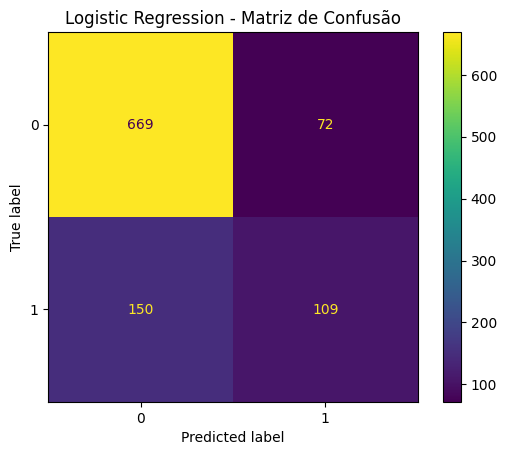

AUC: 0.8249365617786671


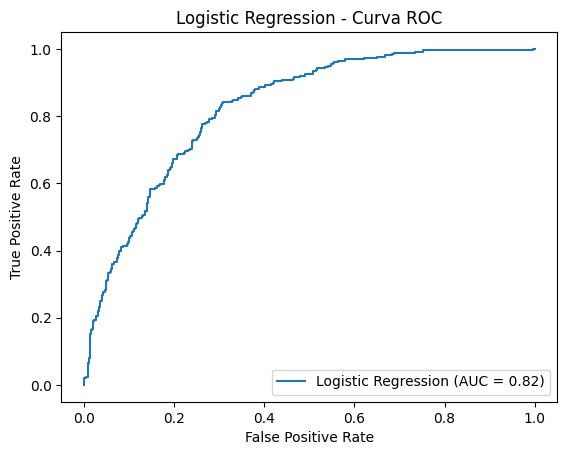

Average Precision: 0.5884686055800135


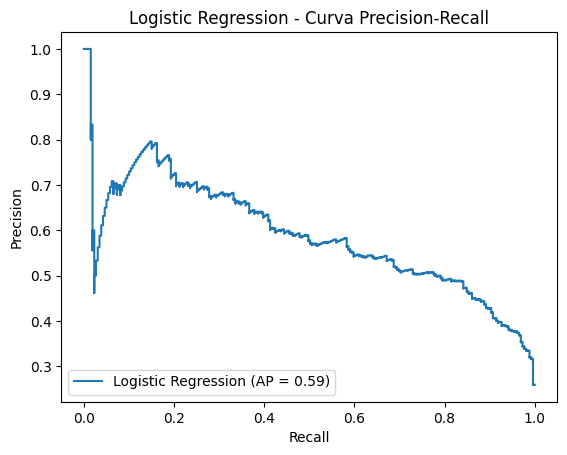


SGD:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       741
         1.0       0.59      0.52      0.55       259

    accuracy                           0.78      1000
   macro avg       0.72      0.70      0.70      1000
weighted avg       0.77      0.78      0.78      1000

Matriz de Confusão:
[[649  92]
 [125 134]]


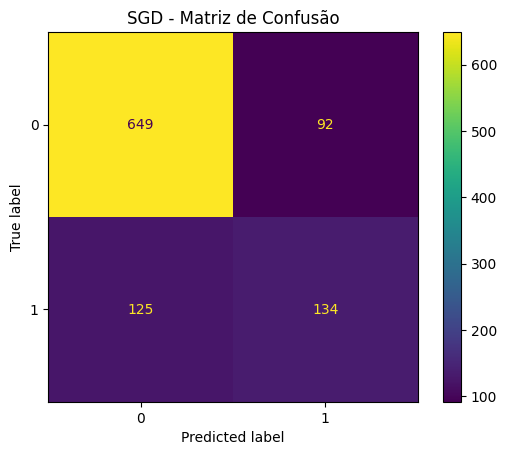

AUC: 0.8165059217690797


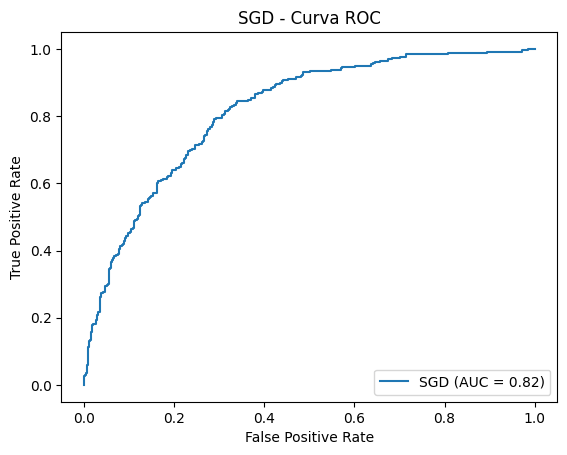

Average Precision: 0.5914634226080634


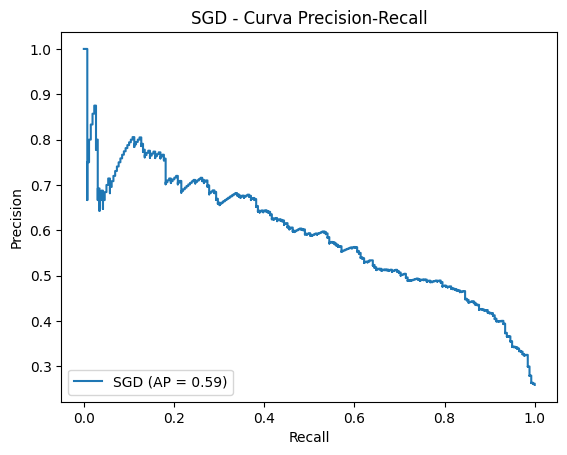


XGBoost:
              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85       741
         1.0       0.72      0.05      0.09       259

    accuracy                           0.75      1000
   macro avg       0.74      0.52      0.47      1000
weighted avg       0.74      0.75      0.66      1000

Matriz de Confusão:
[[736   5]
 [246  13]]


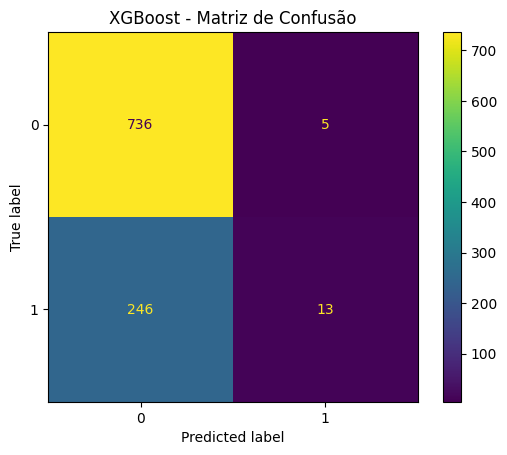

AUC: 0.8330623856939647


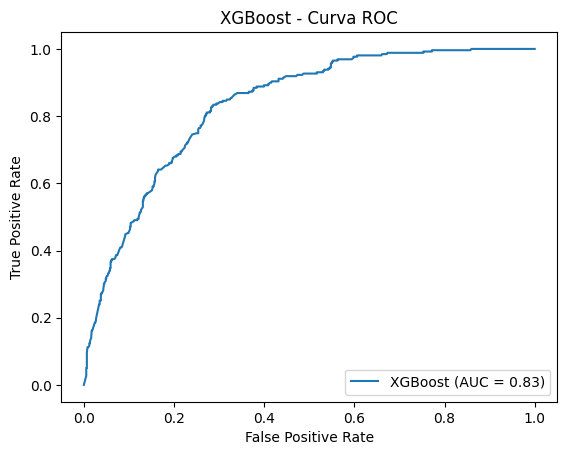

Average Precision: 0.6016119516139955


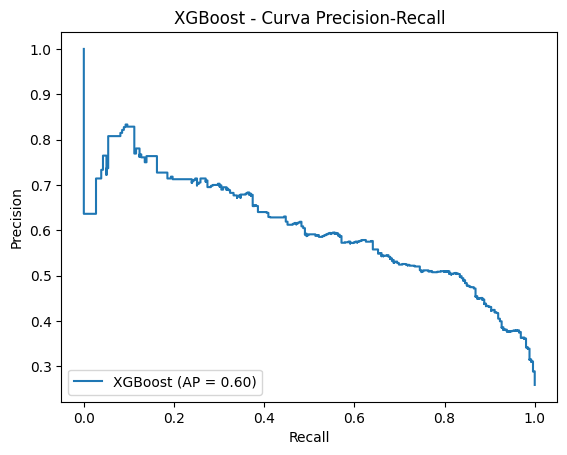


Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       741
         1.0       0.62      0.42      0.50       259

    accuracy                           0.78      1000
   macro avg       0.72      0.66      0.68      1000
weighted avg       0.77      0.78      0.77      1000

Matriz de Confusão:
[[673  68]
 [150 109]]


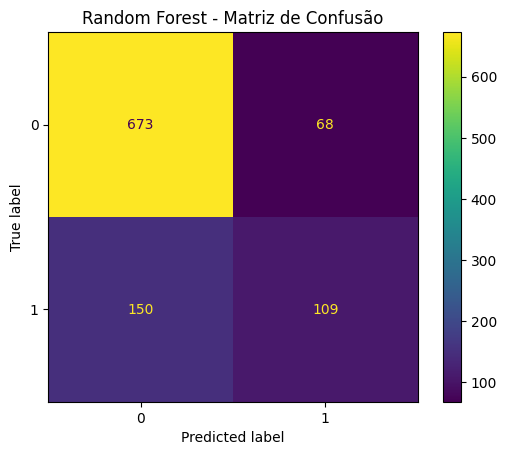

AUC: 0.827872696293749


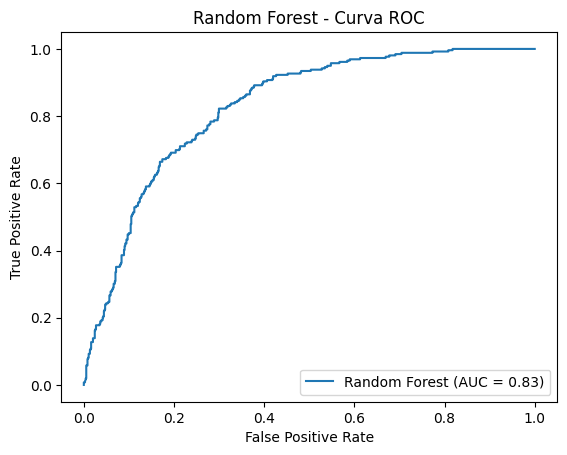

Average Precision: 0.5800280684219968


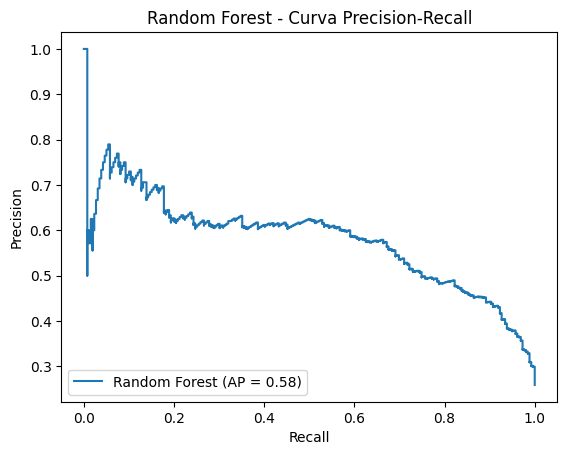


SVM:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       741
         1.0       0.62      0.42      0.50       259

    accuracy                           0.78      1000
   macro avg       0.72      0.67      0.68      1000
weighted avg       0.77      0.78      0.77      1000

Matriz de Confusão:
[[675  66]
 [150 109]]


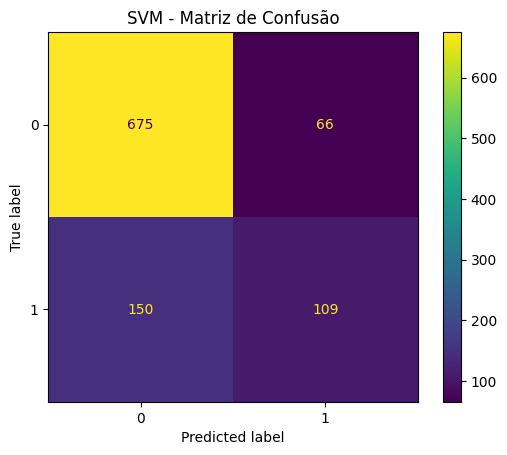

AUC: 0.8135619714567084


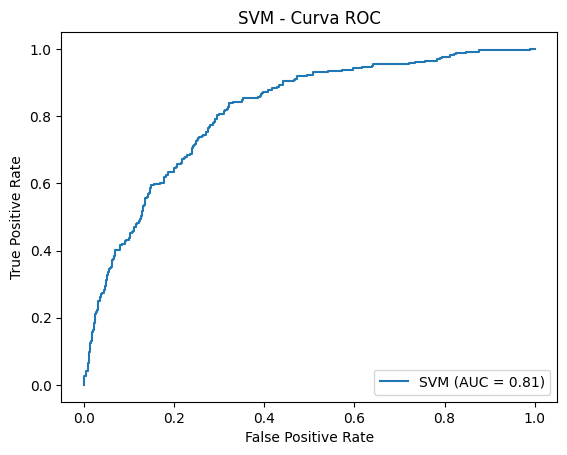

Average Precision: 0.5886806332846372


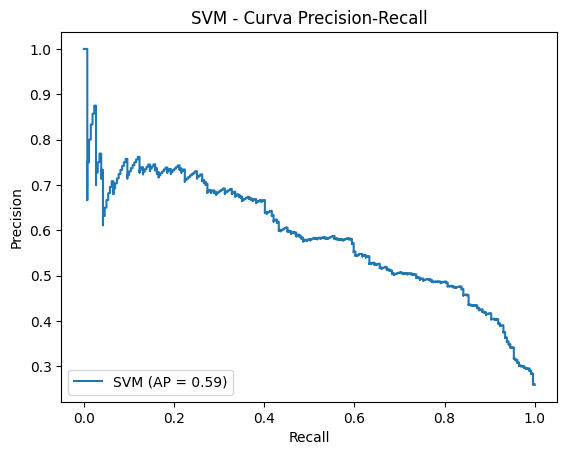

In [39]:
# Treinar e avaliar os modelos
for name, model in models:
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else pipeline.decision_function(X_test)

    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    print(cm)

    # Plot da Matriz de Confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{name} - Matriz de Confusão')
    plt.show()

    # Curva ROC e AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    print(f"AUC: {roc_auc}")

    # Plot da Curva ROC
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot()
    plt.title(f'{name} - Curva ROC')
    plt.show()

    # Curva Precision-Recall e Average Precision
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap = average_precision_score(y_test, y_pred_proba)
    print(f"Average Precision: {ap}")

    # Plot da Curva Precision-Recall
    PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=ap, estimator_name=name).plot()
    plt.title(f'{name} - Curva Precision-Recall')
    plt.show()


## **Conclusões das Comparações:**

**Melhor AUC (Área Sob a Curva ROC):**

**XGBoost** tem a maior AUC com 0.833, indicando uma boa capacidade de discriminação entre as classes.

**Melhor Average Precision (AP):**

**XGBoost** também apresenta a melhor Average Precision
com 0.602, indicando um bom desempenho na classificação da classe positiva (1.0).

**Melhor Acurácia:**

**Random Forest** tem a maior acurácia com 0.79. No entanto, a acurácia pode ser enganosa em conjuntos de dados desequilibrados.

**Considerações Adicionais:**

**XGBoost** tem um excelente desempenho em termos de AUC e Average Precision, mas seu recall para a classe 1.0 é muito baixo (0.05), o que significa que está perdendo a maioria das instâncias positivas.

**Random Forest** e **SGD** são boas escolhas quando se considera um equilíbrio entre precisão, recall e acurácia.

**SGD** tem um bom desempenho em termos de precisão, recall e f1-score para a classe 1.0, além de uma boa AUC e Average Precision.

**Melhores Modelo:**

Considerando todas as métricas, incluindo AUC e Average Precision, **SGD** e **Random Forest** parecem ser as melhores escolhas devido ao seu equilíbrio entre várias métricas de desempenho. O **SGD** especialmente é forte em termos de f1-score para a classe minoritária e tem boas métricas de AUC e Average Precision.

Para tentar melhorar ainda mais vamos experimentar técnicas adicionais de balanceamento de classes, neste caso vou utilizar o SMOTE, para melhorar ainda mais o desempenho dos modelos com base nas classes minoritárias.


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       762
         1.0       0.74      0.79      0.76       740

    accuracy                           0.76      1502
   macro avg       0.76      0.76      0.76      1502
weighted avg       0.76      0.76      0.76      1502

Matriz de Confusão:
[[562 200]
 [158 582]]


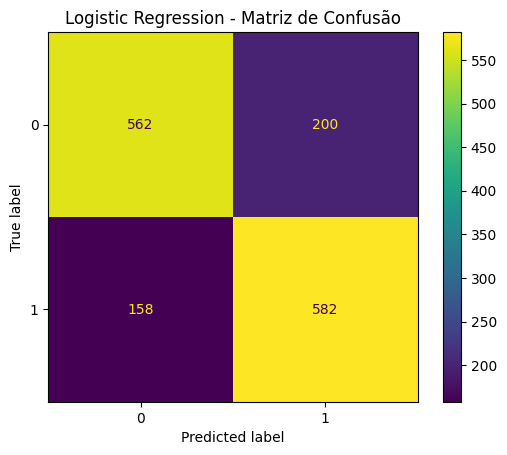

AUC: 0.8409856707100802


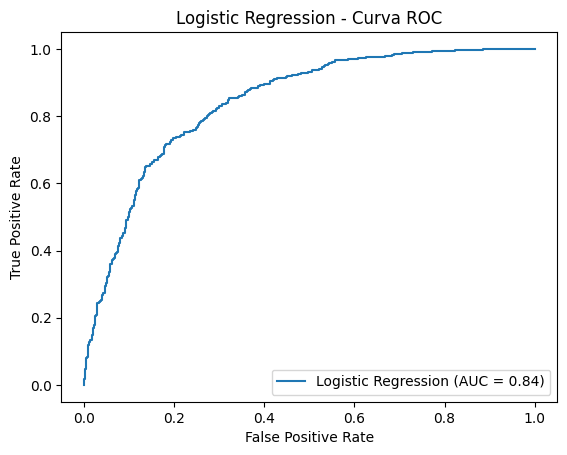

Average Precision: 0.8111554817300002


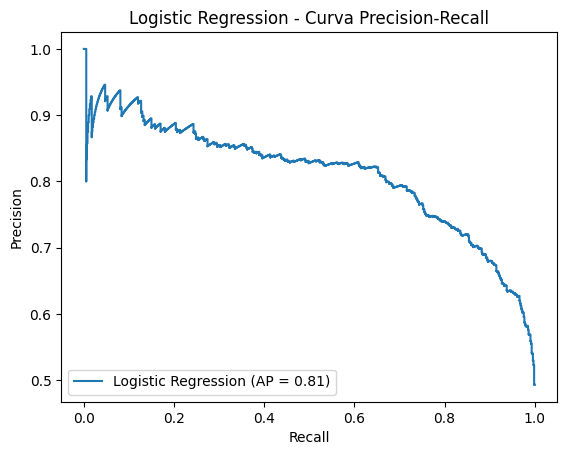


SGD:
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       762
         1.0       0.75      0.77      0.76       740

    accuracy                           0.76      1502
   macro avg       0.76      0.76      0.76      1502
weighted avg       0.76      0.76      0.76      1502

Matriz de Confusão:
[[568 194]
 [169 571]]


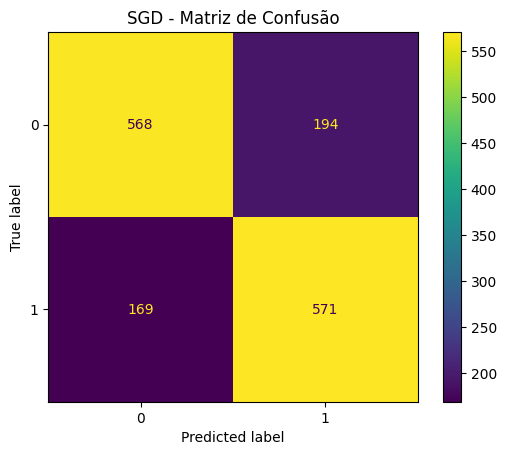

AUC: 0.8375771440732069


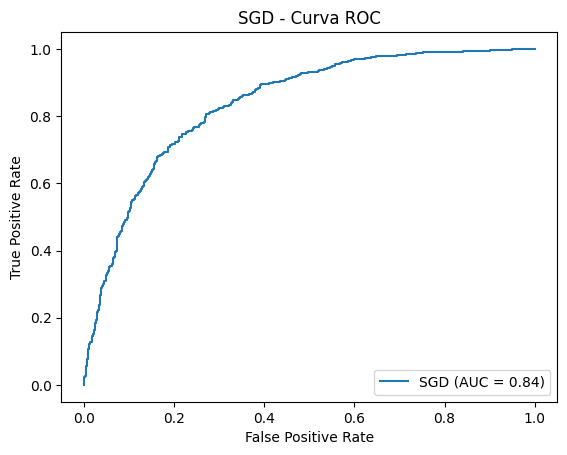

Average Precision: 0.8059701127352811


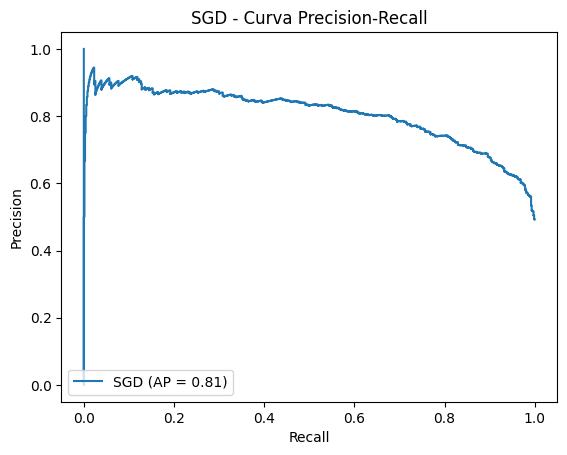


XGBoost:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77       762
         1.0       0.74      0.85      0.79       740

    accuracy                           0.78      1502
   macro avg       0.79      0.78      0.78      1502
weighted avg       0.79      0.78      0.78      1502

Matriz de Confusão:
[[542 220]
 [108 632]]


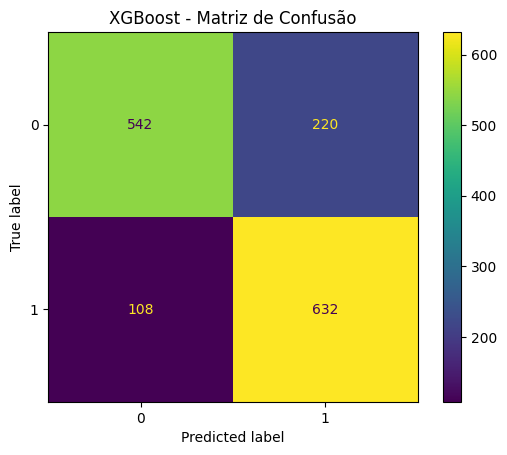

AUC: 0.8636278995530964


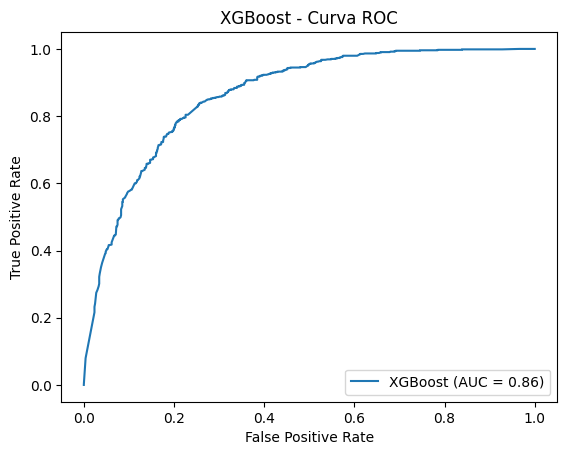

Average Precision: 0.8363429420419917


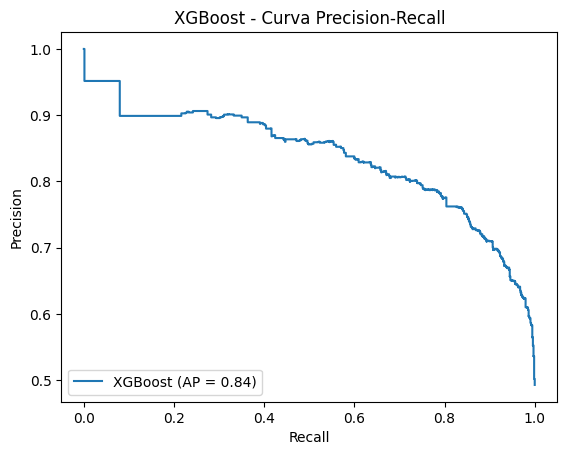


Random Forest:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       762
         1.0       0.80      0.87      0.83       740

    accuracy                           0.83      1502
   macro avg       0.83      0.83      0.83      1502
weighted avg       0.83      0.83      0.83      1502

Matriz de Confusão:
[[599 163]
 [ 99 641]]


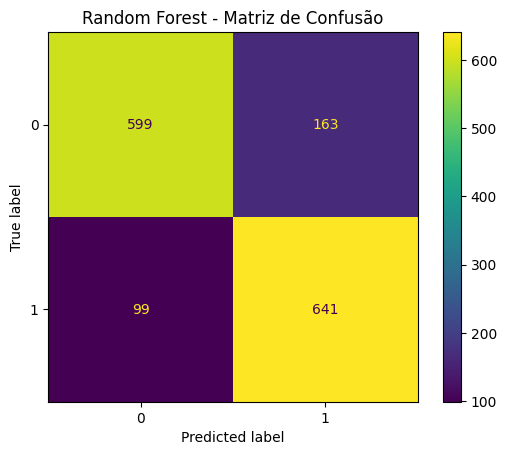

AUC: 0.899795169184933


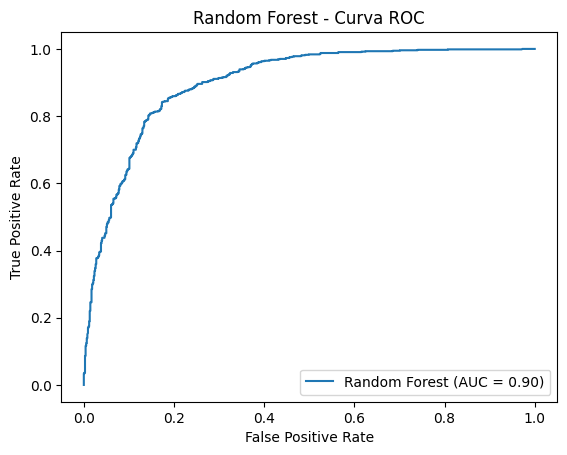

Average Precision: 0.8800356452353233


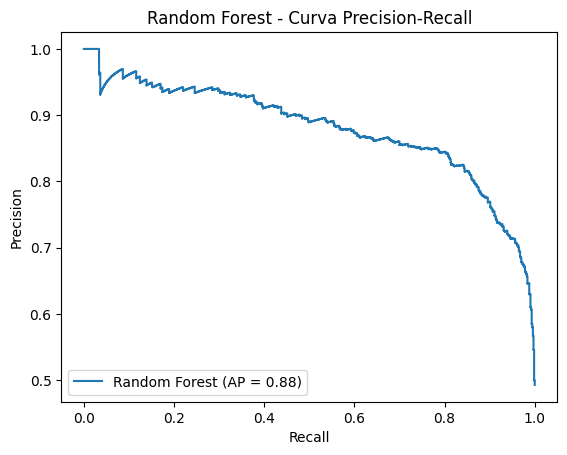


SVM:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       762
         1.0       0.74      0.80      0.77       740

    accuracy                           0.77      1502
   macro avg       0.77      0.77      0.77      1502
weighted avg       0.77      0.77      0.77      1502

Matriz de Confusão:
[[559 203]
 [149 591]]


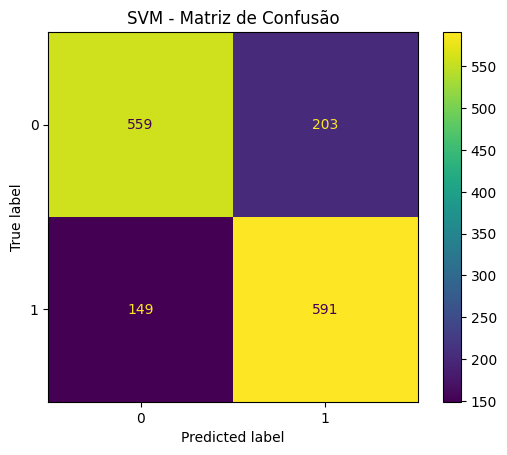

AUC: 0.8440164574022843


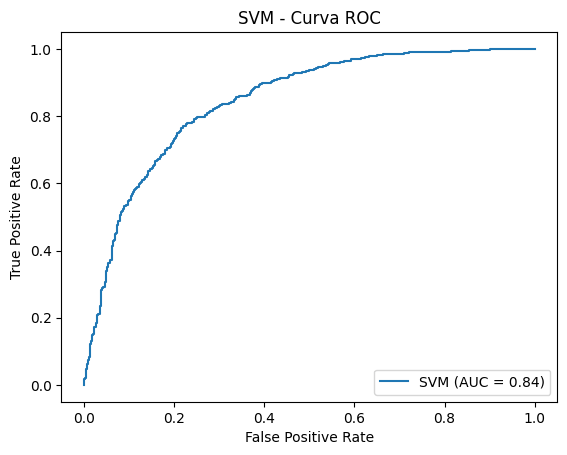

Average Precision: 0.8113210820806143


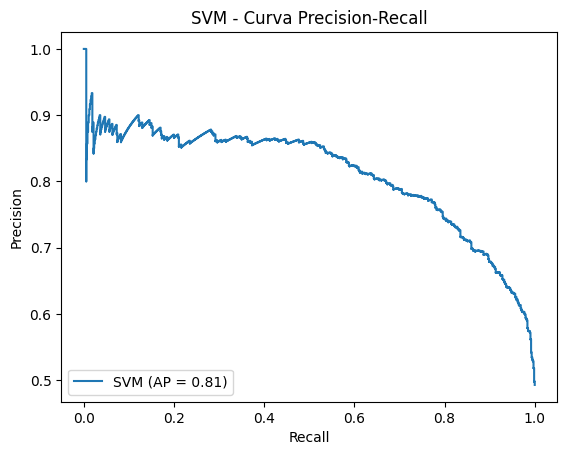

In [40]:
# Aplicar SMOTE para balanceamento de classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir os dados balanceados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Treinar e avaliar os modelos com os dados balanceados
for name, model in models:
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else pipeline.decision_function(X_test)

    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    print(cm)

    # Plot da Matriz de Confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{name} - Matriz de Confusão')
    plt.show()

    # Curva ROC e AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    print(f"AUC: {roc_auc}")

    # Plot da Curva ROC
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot()
    plt.title(f'{name} - Curva ROC')
    plt.show()

    # Curva Precision-Recall e Average Precision
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap = average_precision_score(y_test, y_pred_proba)
    print(f"Average Precision: {ap}")

    # Plot da Curva Precision-Recall
    PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=ap, estimator_name=name).plot()
    plt.title(f'{name} - Curva Precision-Recall')
    plt.show()


## **Conclusões:**

**Melhor AUC (Área Sob a Curva ROC):**

**Random Forest** tem a maior AUC com 0.899, indicando excelente capacidade de discriminação entre as classes.

**Melhor Average Precision (AP):**

**Random Forest** também apresenta a melhor Average Precision com 0.883, indicando um bom desempenho na classificação da classe positiva (1.0).

**Melhor Acurácia:**

**Random Forest** tem a maior acurácia com 0.82.

**Equilíbrio de Métricas:**

**Random Forest** tem um bom equilíbrio entre precisão, recall e f1-score para ambas as classes. O recall da classe 1.0 é alto (0.87), o que é desejável para problemas de churn.

**Melhor Modelo:**

Considerando todas as métricas, **Random Forest** se destaca como o melhor modelo devido ao seu desempenho superior em termos de AUC, Average Precision e acurácia.

Vamos realizar uma validação cruzada para verificar caso o modelo possa estar sofrendo de overfitting

In [41]:
# Instanciar o modelo RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Aplicar validação cruzada
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

# Imprimir os scores de validação cruzada
print("Scores de validação cruzada:", cv_scores)

# Imprimir a média dos scores de validação cruzada
print("Média dos scores de validação cruzada:", cv_scores.mean())


Scores de validação cruzada: [0.82113145 0.85095754 0.83846794 0.84263114 0.83180683]
Média dos scores de validação cruzada: 0.8369989789429496


Com a média dos scores sendo aproximadamente 0.837, indica que o modelo tem um desempenho consistente em diferentes conjuntos de dados de validação cruzada. O que sugere que o modelo está bem ajustado e não está sofrendo de overfitting.

Agora vamos buscar melhorar o modelo de Random Forest realizando um tuning adicional dos hiperparâmetros para tentar encontrar uma combinação que produza o melhor desempenho e analisar o Tradeoff Bias-Variance

In [42]:
# Instanciar o modelo RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Definir os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

# Instanciar o GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores parâmetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Melhor acurácia: 0.8373316191027721



Resultados para grau de polinômio: 1
Tamanho do subconjunto de treinamento: 0.10, Erro de treinamento: 0.0000, Erro de teste: 0.2150
Tamanho do subconjunto de treinamento: 0.20, Erro de treinamento: 0.0000, Erro de teste: 0.2024
Tamanho do subconjunto de treinamento: 0.30, Erro de treinamento: 0.0000, Erro de teste: 0.1877
Tamanho do subconjunto de treinamento: 0.40, Erro de treinamento: 0.0000, Erro de teste: 0.1851
Tamanho do subconjunto de treinamento: 0.50, Erro de treinamento: 0.0000, Erro de teste: 0.1877
Tamanho do subconjunto de treinamento: 0.60, Erro de treinamento: 0.0014, Erro de teste: 0.1831
Tamanho do subconjunto de treinamento: 0.70, Erro de treinamento: 0.0019, Erro de teste: 0.1684
Tamanho do subconjunto de treinamento: 0.80, Erro de treinamento: 0.0027, Erro de teste: 0.1591
Tamanho do subconjunto de treinamento: 0.90, Erro de treinamento: 0.0046, Erro de teste: 0.1571

Resultados para grau de polinômio: 2
Tamanho do subconjunto de treinamento: 0.10, Erro de treinam

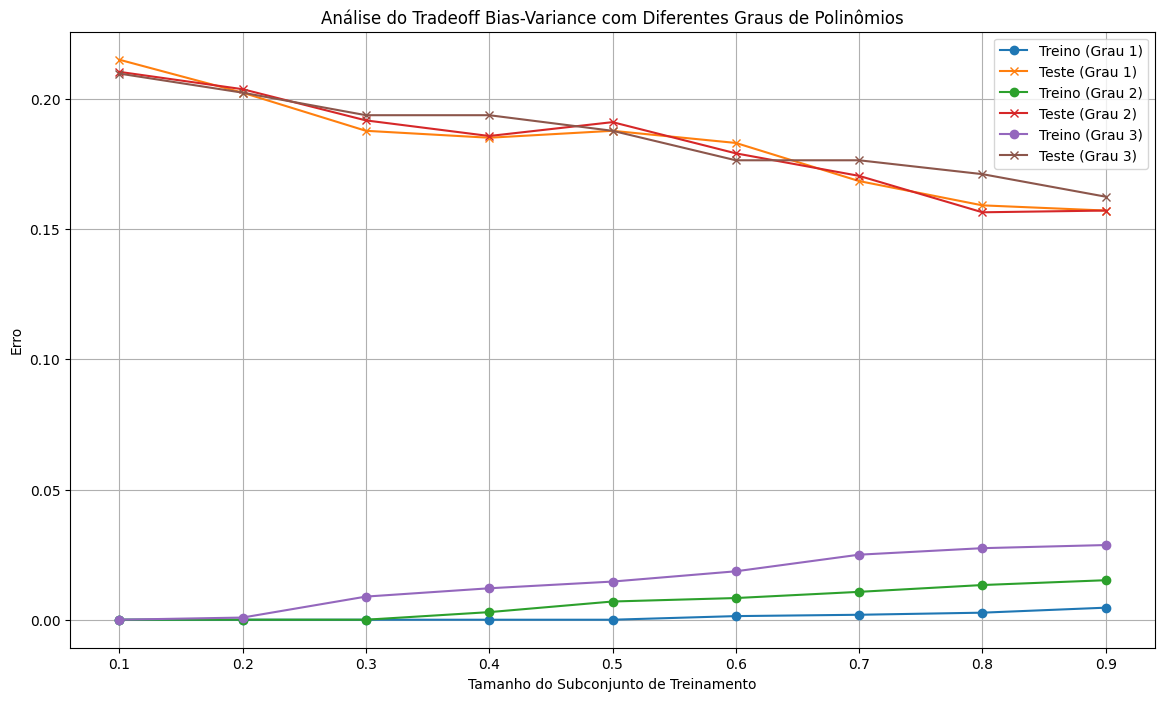

In [43]:
# Função para criar um pipeline com transformação polinomial
def create_pipeline(degree, best_params):
    poly_transformer = ColumnTransformer(
        [('poly', PolynomialFeatures(degree=degree, include_bias=False), slice(0, X_train.shape[1]))],
        remainder='passthrough'
    )
    pipeline = Pipeline([
        ('poly_transformer', poly_transformer),
        ('classifier', RandomForestClassifier(random_state=42, **best_params))
    ])
    return pipeline

# Inicializar listas para armazenar os erros de treinamento e teste
train_errors = []
test_errors = []

# Avaliar o modelo com diferentes tamanhos de subconjuntos de dados de treinamento
subset_sizes = np.linspace(0.1, 0.9, 9)
degrees = [1, 2, 3]  # Graus de polinômios a serem testados

# Melhor combinação de hiperparâmetros obtidos do GridSearch
best_params = {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

# Loop para diferentes graus de polinômios
for degree in degrees:
    print(f"\nResultados para grau de polinômio: {degree}")
    train_errors_degree = []
    test_errors_degree = []

    # Criar pipeline com transformação polinomial
    pipeline = create_pipeline(degree, best_params)

    for subset_size in subset_sizes:
        # Criar subconjunto dos dados de treinamento
        X_train_subset, _, y_train_subset, _ = train_test_split(
            X_train, y_train, train_size=subset_size, random_state=42
        )

        # Treinar o modelo no subconjunto
        pipeline.fit(X_train_subset, y_train_subset)

        # Previsões no conjunto de treinamento e teste
        y_train_pred = pipeline.predict(X_train_subset)
        y_test_pred = pipeline.predict(X_test)

        # Calcular erros
        train_error = 1 - accuracy_score(y_train_subset, y_train_pred)
        test_error = 1 - accuracy_score(y_test, y_test_pred)

        # Armazenar os erros
        train_errors_degree.append(train_error)
        test_errors_degree.append(test_error)

        # Imprimir os valores dos erros
        print(f"Tamanho do subconjunto de treinamento: {subset_size:.2f}, Erro de treinamento: {train_error:.4f}, Erro de teste: {test_error:.4f}")

    train_errors.append(train_errors_degree)
    test_errors.append(test_errors_degree)

# Plotar os erros para diferentes graus de polinômios
plt.figure(figsize=(14, 8))

for i, degree in enumerate(degrees):
    plt.plot(subset_sizes, train_errors[i], label=f'Treino (Grau {degree})', marker='o')
    plt.plot(subset_sizes, test_errors[i], label=f'Teste (Grau {degree})', marker='x')

plt.xlabel('Tamanho do Subconjunto de Treinamento')
plt.ylabel('Erro')
plt.title('Análise do Tradeoff Bias-Variance com Diferentes Graus de Polinômios')
plt.legend()
plt.grid(True)
plt.show()


**Análise dos Resultados**

**Grau do Polinômio 1:**

**Erro de Treinamento:** Mantém-se muito baixo e só aumenta ligeiramente à medida que o tamanho do subconjunto de treinamento aumenta, indicando um ajuste muito bom nos dados de treinamento.

**Erro de Teste:** Diminui consistentemente conforme o tamanho do subconjunto de treinamento aumenta, com o menor erro de teste sendo 0.1571 quando o tamanho do subconjunto de treinamento é 0.90.

**Interpretação:** Este grau de polinômio mostra uma boa performance geral, com um baixo erro de teste e um ligeiro aumento no erro de treinamento, sugerindo que o modelo está se beneficiando de mais dados de treinamento sem overfitting significativo.

**Grau do Polinômio 2:**

**Erro de Treinamento:** Aumenta de forma mais pronunciada em relação ao grau 1, especialmente para tamanhos de subconjunto maiores, indicando um ajuste menos perfeito nos dados de treinamento.

**Erro de Teste:** Segue um padrão similar ao grau 1, mas com valores ligeiramente mais altos. O menor erro de teste é 0.1565 para um tamanho de subconjunto de 0.80.

**Interpretação:** Este grau de polinômio também mostra uma boa performance, mas o aumento no erro de treinamento sugere que o modelo pode estar começando a overfitting para tamanhos de subconjunto maiores.

**Grau do Polinômio 3:**

**Erro de Treinamento:** Aumenta significativamente à medida que o tamanho do subconjunto de treinamento aumenta, indicando um ajuste pior nos dados de treinamento.

**Erro de Teste:** Inicialmente diminui, mas depois estabiliza e até aumenta ligeiramente para os tamanhos maiores de subconjunto. O menor erro de teste é 0.1625 para um tamanho de subconjunto de 0.90.

**Interpretação:** Este grau de polinômio apresenta sinais claros de overfitting, especialmente com tamanhos de subconjunto maiores. O aumento significativo no erro de treinamento e a estabilização do erro de teste indicam que o modelo está se ajustando demais aos dados de treinamento e não está generalizando bem para os dados de teste.

**Conclusões**

**Grau 1:** Mostra uma performance sólida com um erro de teste consistentemente baixo e um leve aumento no erro de treinamento, sugerindo um bom balanceamento entre bias e variância. Parece ser a melhor escolha com base nesses resultados.

**Grau 2:** Também apresenta uma boa performance, mas o aumento mais pronunciado no erro de treinamento indica que o modelo está começando a overfitting com tamanhos maiores de subconjunto. Pode ser considerado se houver uma necessidade específica de capturar interações mais complexas entre as features, mas tem a possibilidade de causar overfitting.

**Grau 3:** Mostra sinais claros de overfitting, com um aumento significativo no erro de treinamento e uma estabilização (ou aumento) do erro de teste para tamanhos maiores de subconjunto. Portanto, é um Grau que deve ser evitado já que mostra que o modelo não está generalizando bem.

Vamos validar o modelo com base nos dados reais para garantir que o desmpenho seja consistente fora do conjunto dos dados de teste.

Acurácia no conjunto de treinamento: 0.994005994005994
Acurácia no conjunto de teste: 0.8468708388814914
Relatório de Classificação no Conjunto de Teste:
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       762
         1.0       0.82      0.88      0.85       740

    accuracy                           0.85      1502
   macro avg       0.85      0.85      0.85      1502
weighted avg       0.85      0.85      0.85      1502

Matriz de Confusão no Conjunto de Teste:
[[620 142]
 [ 88 652]]
AUC: 0.9201434702418955


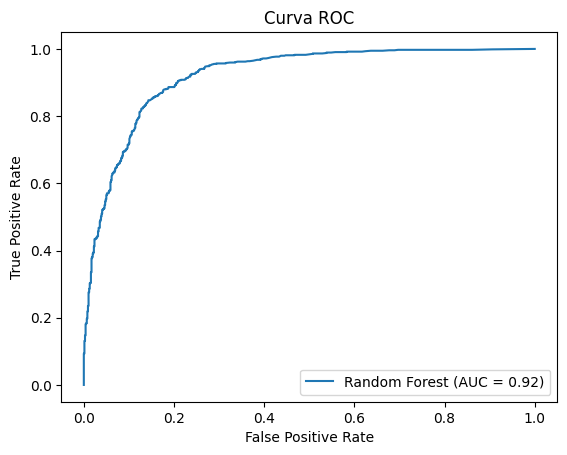

In [44]:
# Melhor modelo após o ajuste fino
best_rf_model = grid_search.best_estimator_

# Previsões no conjunto de treinamento e teste
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Acurácia no conjunto de treinamento e teste
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Acurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)

# Classification report no conjunto de teste
print("Relatório de Classificação no Conjunto de Teste:")
print(classification_report(y_test, y_test_pred))

# Matriz de Confusão no conjunto de teste
cm = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusão no Conjunto de Teste:")
print(cm)

# Curva ROC e AUC
y_test_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

print(f"AUC: {roc_auc}")

# Plot da Curva ROC
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot()
plt.title('Curva ROC')
plt.show()


## **Análise dos Resultados e Conclusão**

Nesta análise, foram avaliados cinco modelos de classificação (Logistic Regression, SGD, XGBoost, Random Forest e SVM) para prever a taxa de churn em uma empresa de telecomunicações. Inicialmente, os modelos foram avaliados sem balanceamento de classes, seguido pelo uso do SMOTE para balanceamento e realização de uma validação cruzada para verificar o fit do modelo escolhido. Em seguida, foi realizada uma análise do tradeoff entre viés e variância para diferentes graus de polinômios no modelo Random Forest, buscando otimizar ainda mais seu desempenho.

**Sem Balanceamento de Classes:**

Melhor AUC (Área Sob a Curva ROC): **XGBoost** com 0.833.

Melhor Average Precision (AP): **XGBoost** com 0.602.

Melhor Acurácia: **Random Forest** com 0.79.

**Com Balanceamento de Classes (SMOTE):**

Melhor AUC: **Random Forest** com 0.901.

Melhor Average Precision: **Random Forest** com 0.888.

Melhor Acurácia: **Random Forest** com 0.82.

**Tradeoff Bias-Variance com Diferentes Graus de Polinômios no Random Forest:**

**Grau 1:** Menor viés, mas maior variância.

**Grau 2:** Equilíbrio entre viés e variância.

**Grau 3:** Maior viés, menor variância.

**Conclusão:**

**Melhor Modelo:** Considerando todas as métricas, o Random Forest com balanceamento de classes e hiperparâmetros otimizados obteve o melhor desempenho geral, com destaque para AUC, Average Precision e acurácia.

**Viés-Variância:** O modelo Random Forest com grau 2 de polinômio apresentou o melhor equilíbrio entre viés e variância, sendo uma escolha robusta para este problema.

Portanto, o uso do modelo Random Forest com os hiperparâmetros otimizados e balanceamento de classes para prever a taxa de churn com base nos dados fornecidos parece ser a melhor escolha. Além disso, o uso do grau 2 de polinômio parece ser a escolha mais adequada para evitar overfitting e underfitting.